In [1]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'sklearn'

In [29]:
df = pd.read_csv('csvs/scored_pers.csv', sep='\t')

In [30]:
df.drop(df.columns[:2],axis=1, inplace=True)
df.drop(['duplicaten bevatten afwijkende gegevens', 'Heeft geen correct id', 'imnr', 'map'], axis=1, inplace=True)
df.head()

,persoonsId,initialen,tussenvoegsel,achternaam,geboortejaar,hasBirthPlace,hasResidenceLocation,hasSchema,hasUnit,samenstelling,...,front_score,rest_score,normalized_religion,normalized_score,normalized_samenstelling,id,reis,age,age_bin,normalized_schemas
0,34120,J.A.M.,NaN,Boschker,1932,NaN,Aalten,NAMA,6,Gezin,...,4,3,catholic,medium,Gezin,34120,1956,24,20-25,NAMA
1,46567,N.J.,NaN,Schipper,1933,NaN,Abbekerk,NAMA,1,Alleen,...,2,1,catholic,empty,Alleen,46567,1955,22,20-25,NAMA
2,3053,Th.H.A.,van den,Broek,1914,NaN,Afferden,NAMA,7,Gezin,...,4,7,catholic,dense,Gezin,3053,1958,44,40-45,NAMA
3,3053,Th.H.A.,van den,Broek,1914,NaN,NaN,LP-VER,7,Echtpaar,...,4,7,NaN,dense,Echtpaar,3053,1958,44,40-45,LP
4,5515,L.F.,van,Esseveld,1892,Oosbaan,Alkmaar,LP,2,Echtpaar,...,3,4,protestant,large,Echtpaar,5515,1953,61,55-60,LP


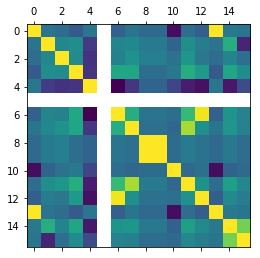

In [11]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())

In [23]:
corr = df.corr()
corr

,hasUnit,adresAantal,total_score,edges,imnm,front_score,rest_score,id,reis,age
hasUnit,1.000000,0.194803,0.123362,0.235860,0.112496,0.263428,0.057950,-0.005145,0.141734,0.011029
adresAantal,0.194803,1.000000,0.372099,0.359982,0.006265,0.414413,0.288864,-0.119947,0.362343,0.197197
total_score,0.123362,0.372099,1.000000,0.414130,0.042866,0.487923,0.964966,-0.081339,0.248341,0.128860
edges,0.235860,0.359982,0.414130,1.000000,0.010427,0.796951,0.220808,0.046612,0.257625,0.123243
imnm,0.112496,0.006265,0.042866,0.010427,1.000000,0.081149,0.023259,-0.028849,0.071665,-0.000832
front_score,0.263428,0.414413,0.487923,0.796951,0.081149,1.000000,0.241805,-0.002517,0.327031,0.160915
rest_score,0.057950,0.288864,0.964966,0.220808,0.023259,0.241805,1.000000,-0.089662,0.177762,0.094876
id,-0.005145,-0.119947,-0.081339,0.046612,-0.028849,-0.002517,-0.089662,1.000000,0.070550,0.043811
reis,0.141734,0.362343,0.248341,0.257625,0.071665,0.327031,0.177762,0.070550,1.000000,0.672322
age,0.011029,0.197197,0.128860,0.123243,-0.000832,0.160915,0.094876,0.043811,0.672322,1.000000


In [24]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    


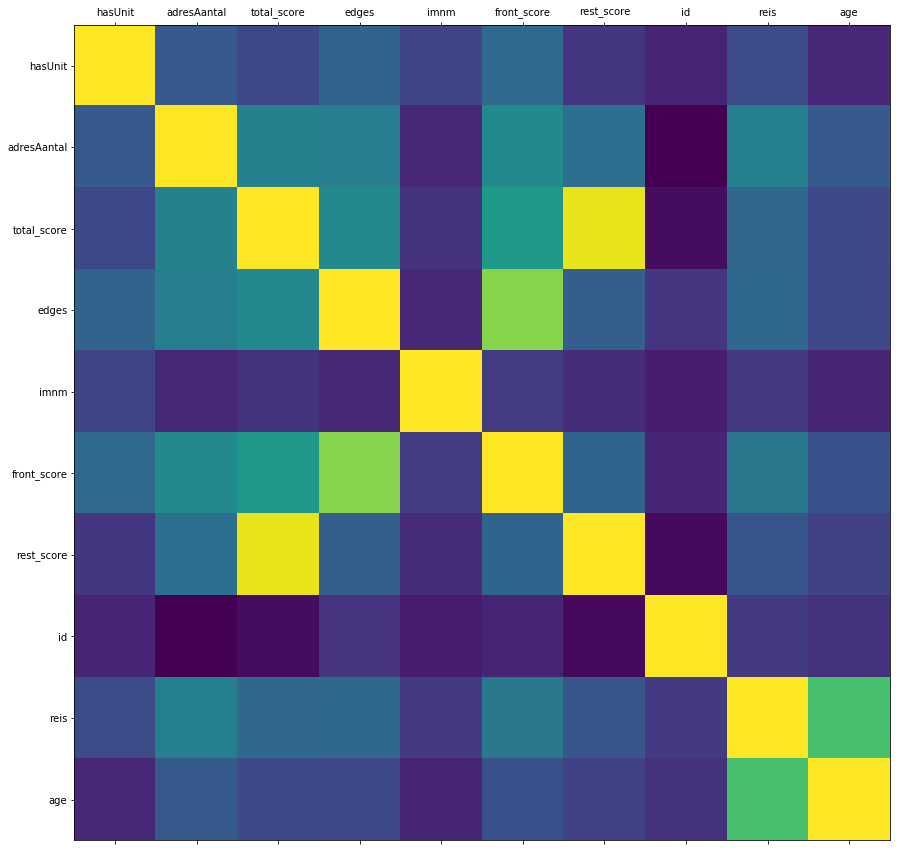

In [25]:
plot_corr(df, size=15)

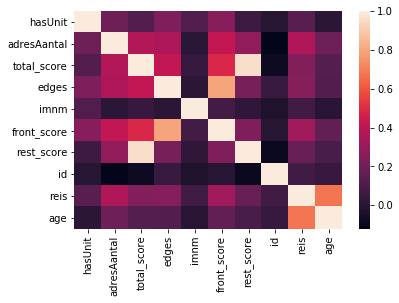

In [26]:
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

/Users/rikhoekstra/anaconda/envs/36/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rikhoekstra/anaconda/envs/36/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


ValueError: color kwarg must have one color per data set. 1 data sets and 551 colors were provided

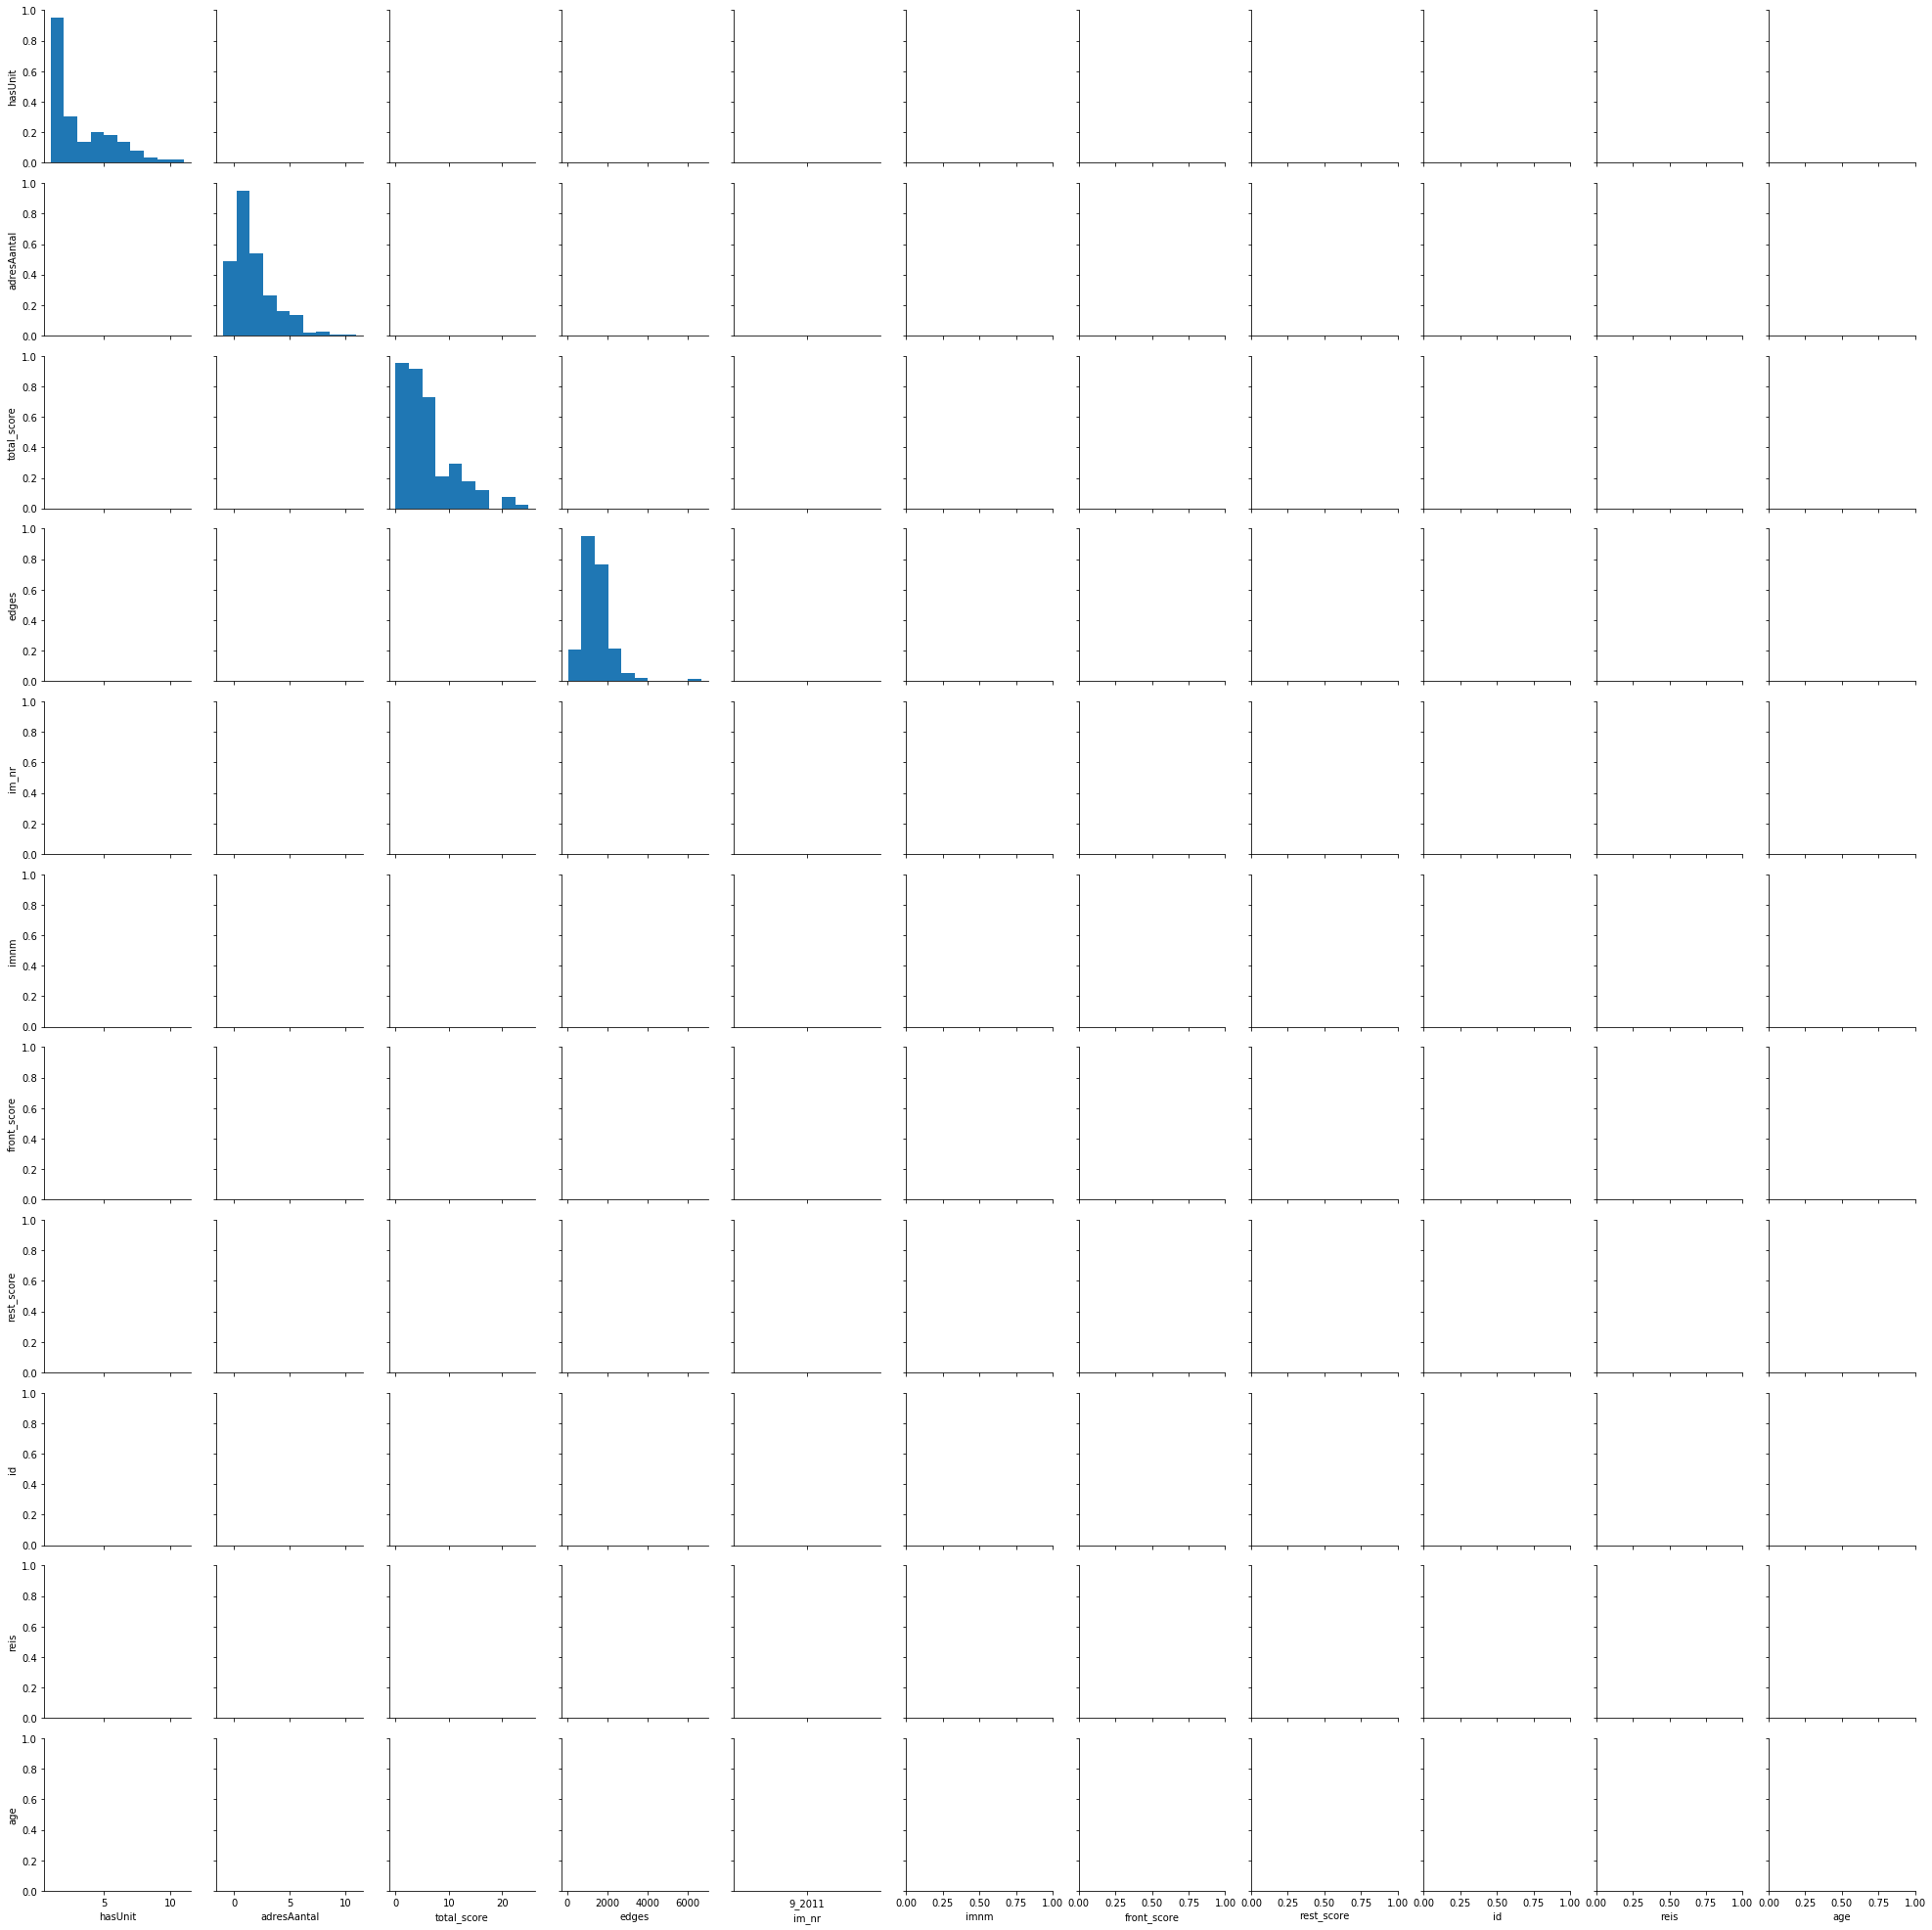

In [27]:
sns.pairplot(df)

/Users/rikhoekstra/anaconda/envs/36/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


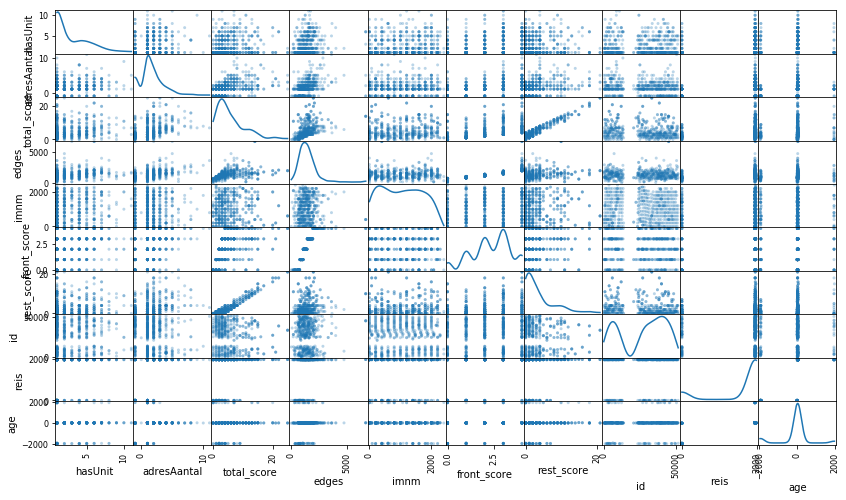

In [28]:
pd.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [31]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient()

,0,1,2,3,4,5,6,7,8,9
0,1,0.347533,0.398948,0.455743,0.0729144,-0.233402,-0.731222,0.477978,-0.442621,0.0151847
1,0.347533,1,-0.284056,0.571003,-0.285483,0.38248,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1,-0.523649,0.152937,-0.139176,-0.0928948,0.0162655,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.44665
4,0.0729144,-0.285483,0.152937,-0.225343,1,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.38248,-0.139176,-0.227577,-0.104438,1,-0.0302517,0.41764,0.205851,0.0950844
6,-0.731222,-0.362842,-0.0928948,-0.481548,-0.147477,-0.0302517,1,-0.49444,0.381407,-0.353652
7,0.477978,0.642578,0.0162655,0.473286,-0.523283,0.41764,-0.49444,1,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1,0.150421
9,0.0151847,0.190047,-0.383585,0.44665,-0.189916,0.0950844,-0.353652,0.417863,0.150421,1


In [32]:
#with less digits
corr.style.background_gradient().set_precision(2)

,0,1,2,3,4,5,6,7,8,9
0,1,0.35,0.4,0.46,0.073,-0.23,-0.73,0.48,-0.44,0.015
1,0.35,1,-0.28,0.57,-0.29,0.38,-0.36,0.64,0.25,0.19
2,0.4,-0.28,1,-0.52,0.15,-0.14,-0.093,0.016,-0.43,-0.38
3,0.46,0.57,-0.52,1,-0.23,-0.23,-0.48,0.47,0.28,0.45
4,0.073,-0.29,0.15,-0.23,1,-0.1,-0.15,-0.52,-0.61,-0.19
5,-0.23,0.38,-0.14,-0.23,-0.1,1,-0.03,0.42,0.21,0.095
6,-0.73,-0.36,-0.093,-0.48,-0.15,-0.03,1,-0.49,0.38,-0.35
7,0.48,0.64,0.016,0.47,-0.52,0.42,-0.49,1,0.38,0.42
8,-0.44,0.25,-0.43,0.28,-0.61,0.21,0.38,0.38,1,0.15
9,0.015,0.19,-0.38,0.45,-0.19,0.095,-0.35,0.42,0.15,1


In [33]:
#code below taken from https://towardsdatascience.com/principal-component-analysis-your-tutorial-and-code-9719d3d3f376

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df)


In [35]:
import numpy as np

# Compute the mean of the data
mean_vec = np.mean(X, axis=0)

# Compute the covariance matrix
cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)


# OR we can do this with one line of numpy:
cov_mat = np.cov(X.T)



In [45]:
cov_mat

array([[ 1.11111111,  0.3861473 ,  0.44327553,  0.50638109,  0.08101604,
        -0.25933583, -0.81246839,  0.53108625, -0.4918015 ,  0.01687186],
       [ 0.3861473 ,  1.11111111, -0.31561733,  0.63444795, -0.31720284,
         0.42497819, -0.40315823,  0.71397581,  0.28061732,  0.21116353],
       [ 0.44327553, -0.31561733,  1.11111111, -0.58183214,  0.16992957,
        -0.15464032, -0.10321642,  0.01807279, -0.48223989, -0.42620558],
       [ 0.50638109,  0.63444795, -0.58183214,  1.11111111, -0.25038143,
        -0.25286343, -0.53505318,  0.52587386,  0.31028694,  0.49627766],
       [ 0.08101604, -0.31720284,  0.16992957, -0.25038143,  1.11111111,
        -0.11604226, -0.16386378, -0.58142611, -0.68289278, -0.21101726],
       [-0.25933583,  0.42497819, -0.15464032, -0.25286343, -0.11604226,
         1.11111111, -0.03361297,  0.46404496,  0.22872337,  0.10564937],
       [-0.81246839, -0.40315823, -0.10321642, -0.53505318, -0.16386378,
        -0.03361297,  1.11111111, -0.54937829

In [36]:
# Compute the eigen values and vectors using numpy
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [37]:
eig_pairs

[(3.813071306866915,
  array([-0.23563335, -0.42564423,  0.19901689, -0.43014159,  0.26015961,
         -0.1405442 ,  0.30553283, -0.46853805, -0.20748033, -0.30872706])),
 (2.7981283152096283,
  array([-0.52742219,  0.00184709, -0.35314444, -0.06149752, -0.30974353,
          0.19890996,  0.44521749, -0.03142975,  0.5055589 ,  0.05501837])),
 (1.5700455329852878,
  array([ 0.06699448,  0.1625731 ,  0.48381959, -0.43625863, -0.20011945,
          0.54330851,  0.03689929,  0.34918627,  0.03869573, -0.29095849])),
 (1.2317752612528818,
  array([-0.23531213,  0.1151022 , -0.31679977, -0.1424162 ,  0.51009712,
          0.59246268, -0.20321815, -0.08866043, -0.26269266,  0.28523393])),
 (0.8920325088393607,
  array([ 0.1063861 ,  0.51193034, -0.24815374,  0.22429309,  0.23058966,
          0.04363414,  0.12485712, -0.18278283,  0.04347316, -0.71327228])),
 (0.34447298137451904,
  array([-2.30071994e-04, -2.58732003e-01,  2.27537468e-01,  1.58469584e-01,
          6.26288458e-01, -4.1177486

In [39]:
# Only keep a certain number of eigen vectors based on 
# the "explained variance percentage" which tells us how 
# much information (variance) can be attributed to each 
# of the principal components

exp_var_percentage = 0.97 # Threshold of 97% explained variance

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

num_vec_to_keep = 0

for index, percentage in enumerate(cum_var_exp):
  if percentage > exp_var_percentage:
    num_vec_to_keep = index + 1
    break

In [40]:
# Compute the projection matrix based on the top eigen vectors
num_features = X.shape[1]
proj_mat = eig_pairs[0][1].reshape(num_features,1)
for eig_vec_idx in range(1, num_vec_to_keep):
  proj_mat = np.hstack((proj_mat, eig_pairs[eig_vec_idx][1].reshape(num_features,1)))

# Project the data 
pca_data = X.dot(proj_mat)